# Diabetes Prediction Using Deep Learning with Python

The Ultimate Guide for building Diabetes Classifier and Predicting Possibility of having Diabetes in a Patient by using Neural Networks

## Introduction

Diabetes is a disease that occurs when the blood glucose is too high. Blood glucose is the main source of energy and comes from the food we eat. 

Over time, having too much glucose in the blood can cause health problems and can lead to death. Preventing Diabetes is important and with advancements in AI, predicting the possibility of having Diabetes allows a person to take steps to manage diabetes and treat such situations at early stages making sure that more people can live healthy lives.

In this project, I will demonstrate and show how we can harness the power of Deep Learning and apply it in healthcare. I will walk you through the entire process of how to classify and predict the possibility of having diabetes in a person using Neural Networks with Python.


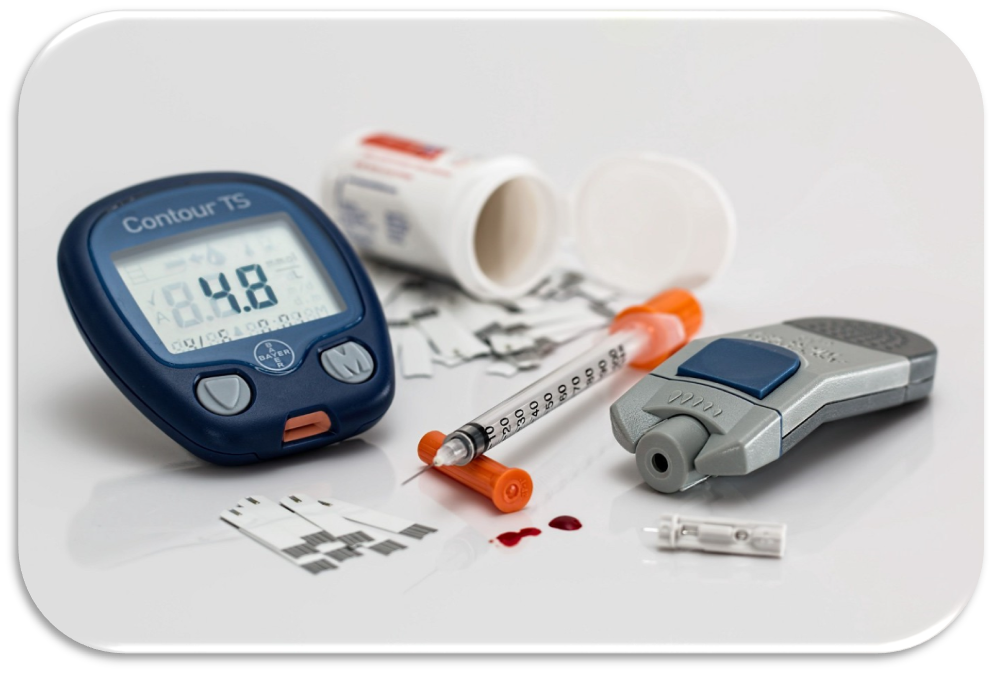

## Problem Statement

The objective of this task is we are given a data set of patient medical records of Pima Indians and whether they had an onset of diabetes within five years. 

Using these data, we will build an effective and optimised Binary Classifier and Predict the possibility of Diabetes in a person using GridSearchCV with Neural Networks and make predictions on test data.


## Importing Libraries  

In [2]:
#Importing Libraries and Reading Train and Test Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(100)
import tensorflow
tensorflow.random.set_seed(100)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


## Reading Train and Test Data

In [3]:
# reading the Train data
df_train = pd.read_csv('/content/train.csv')

In [4]:
# reading the Test data
df_test = pd.read_csv('/content/test.csv')

In [5]:
# looking at the first five rows of thetrain data
df_train.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# looking at the first five rows of the test data
df_test.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


## Checking Shape of Train & Test Data

In [7]:
# shape of the train & test data
df_train.shape, df_test.shape

((668, 10), (100, 9))

In [8]:
# checking the train data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   Class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


## Checking Missing Values in Train Data

In [9]:
# checking missing values in the data
df_train.isnull().sum()

Id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
Class    0
dtype: int64

## Checking Descriptive Statistics of Train Data

In [10]:
# Checking Descriptive Statistics of Train Data
df_train.describe()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualisation

### Checking Distribution of "Class" (Target Attribute)

In [11]:
#Checking Distribution of "Class" Attribute ( Target)
df_train['Class'].value_counts()

0    437
1    231
Name: Class, dtype: int64

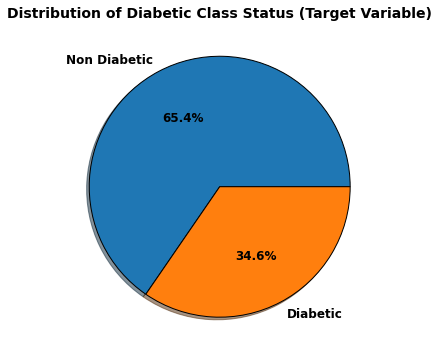

In [12]:
#plt.style.use('ggplot')
plt.figure(figsize=(12,6))
proportion = df_train['Class'].value_counts()
labels = ['Non Diabetic','Diabetic']
plt.title('Distribution of Diabetic Class Status (Target Variable)',fontsize = 14, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 12,'weight' : 'bold'});

###  Plotting Histogram to Check the Distribution of all Attributes

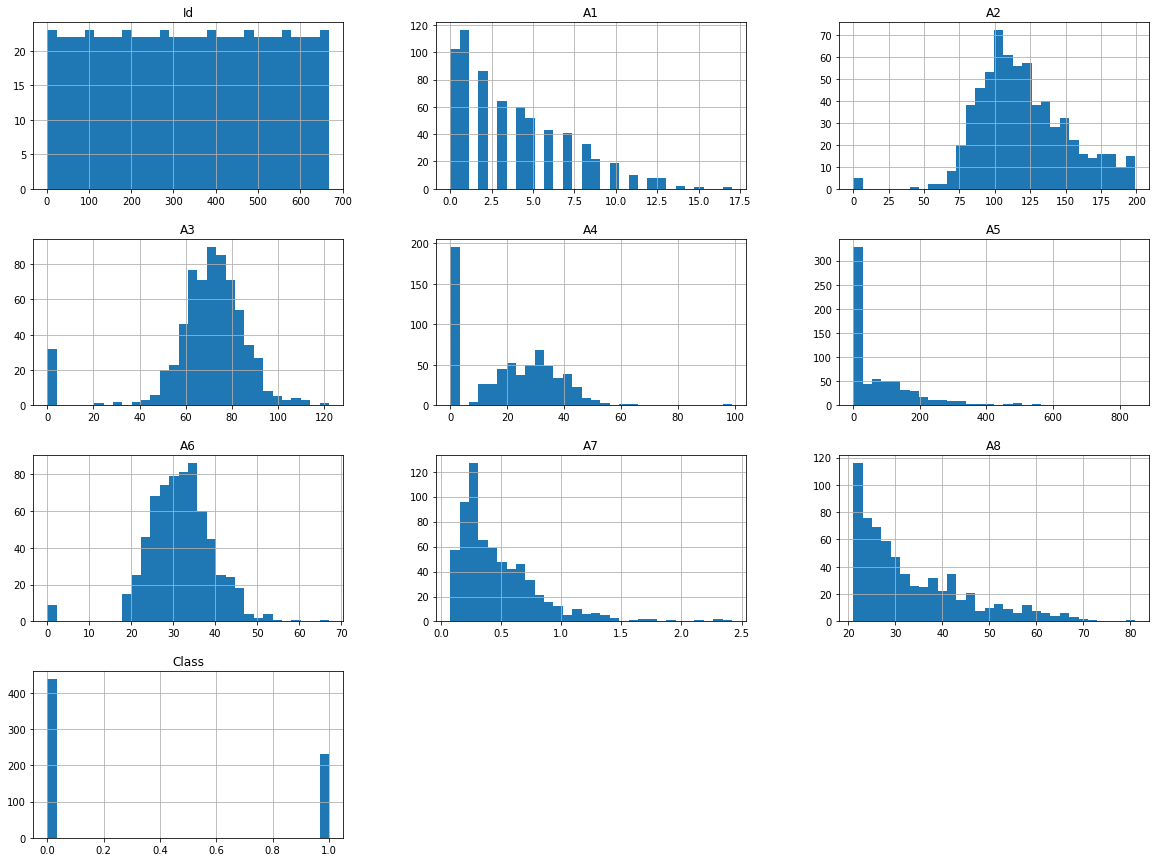

In [13]:
# Histogram to Check the distribution of each attribute
df_train.hist(bins=30, figsize=(20, 15))
plt.title("Histogram to Check the distribution of each attribute",fontsize = 14, weight = 'bold')
plt.show()

### Plotting Density plots to check the Distribution of all Attributes

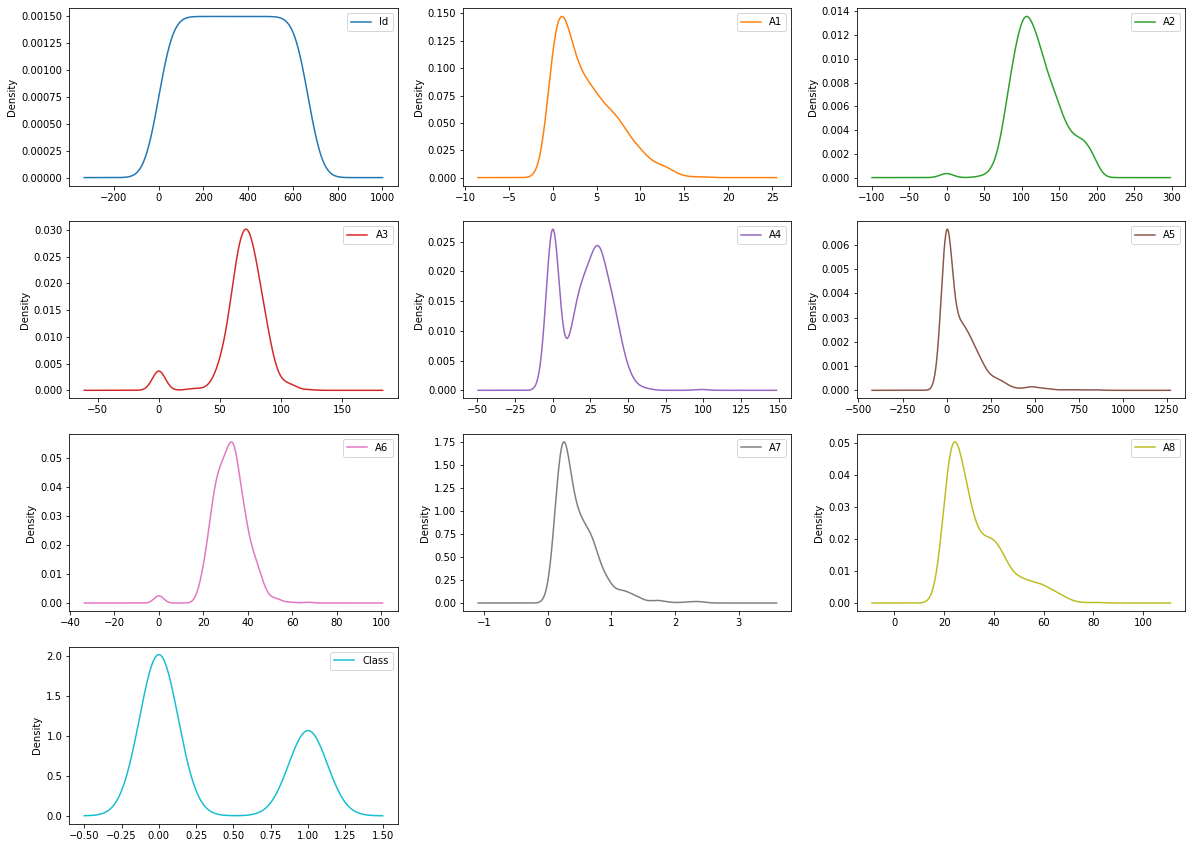

In [14]:
# Density plots to check the Distribution of each Attribute
df_train.plot(kind='density', subplots=True, layout=(4,3), figsize=(20, 15), sharex=False)
plt.show()

### Plotting Box plots to visualize the Distribution of all Atributes

Id           AxesSubplot(0.125,0.71587;0.227941x0.16413)
A1        AxesSubplot(0.398529,0.71587;0.227941x0.16413)
A2        AxesSubplot(0.672059,0.71587;0.227941x0.16413)
A3          AxesSubplot(0.125,0.518913;0.227941x0.16413)
A4       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
A5       AxesSubplot(0.672059,0.518913;0.227941x0.16413)
A6          AxesSubplot(0.125,0.321957;0.227941x0.16413)
A7       AxesSubplot(0.398529,0.321957;0.227941x0.16413)
A8       AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Class          AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

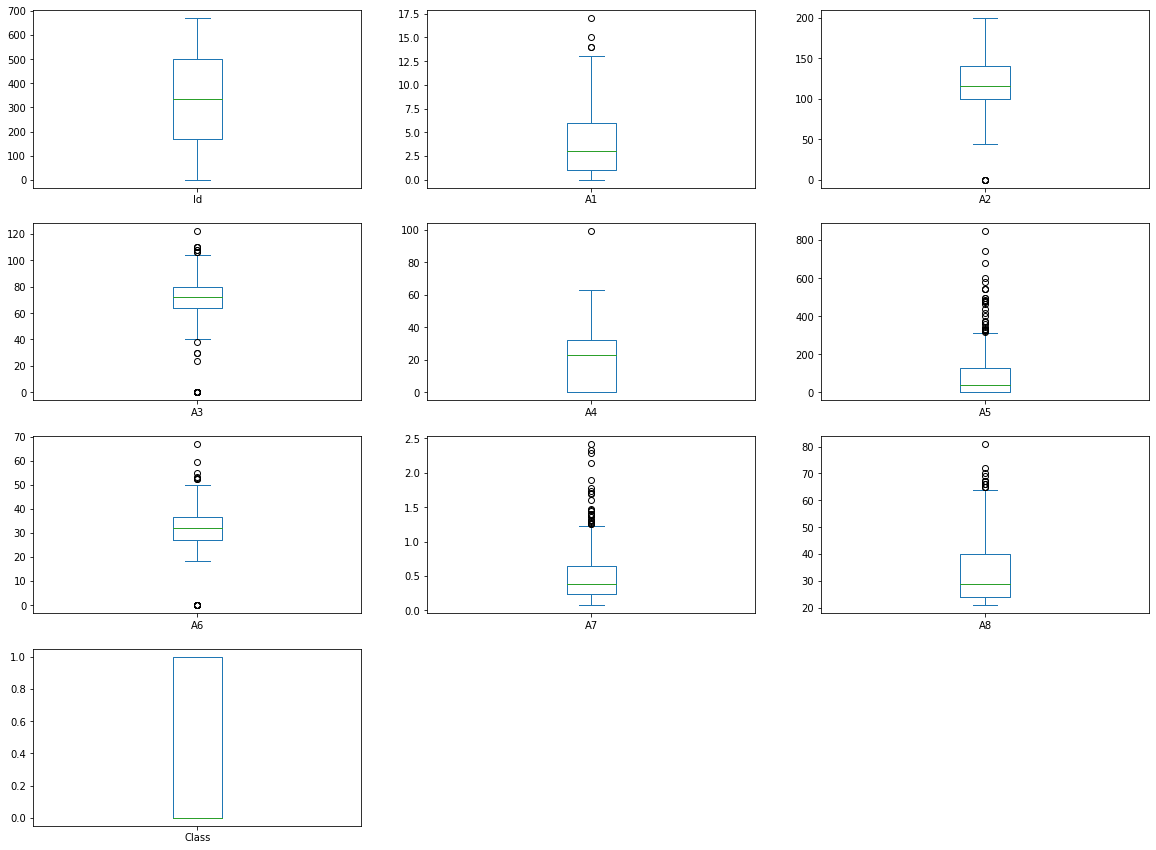

In [15]:
#Box plot to visualize the distribution of all atributes
df_train.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,15))

In [16]:
# Checking the Train Dataframe first 5 rows
df_train.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Feature Scaling Attributes

In [17]:
col = ['Id','A1','A2','A3','A4','A5','A6','A7','A8']
target='Class'
X=df_train[col]
Y=df_train[target].astype(int)

In [18]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)
print(scaler)

StandardScaler()


In [19]:
# Transform and display the training data
X_standardized = scaler.transform(X)
data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6,7,8
count,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02,6.680000e+02
mean,-1.329608e-18,-5.983238e-17,-1.746773e-16,2.222108e-16,-1.662011e-19,-4.155026e-17,4.143392e-16,1.844832e-17,2.044273e-17
std,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00,1.000749e+00
min,-1.729460e+00,-1.133720e+00,-3.731509e+00,-3.523437e+00,-1.284769e+00,-6.882106e-01,-4.073541e+00,-1.170564e+00,-1.033215e+00
25%,-8.647299e-01,-8.363803e-01,-6.633866e-01,-2.433661e-01,-1.284769e+00,-6.882106e-01,-6.086214e-01,-6.993538e-01,-7.768619e-01
50%,0.000000e+00,-2.417001e-01,-1.365373e-01,1.666428e-01,1.519580e-01,-3.728513e-01,1.787698e-02,-2.940980e-01,-3.496070e-01
75%,8.647299e-01,6.503202e-01,6.072499e-01,5.766518e-01,7.141556e-01,4.004268e-01,5.932326e-01,4.805049e-01,5.903537e-01
max,1.729460e+00,3.921061e+00,2.435727e+00,2.729199e+00,4.899405e+00,6.621212e+00,4.505651e+00,5.694601e+00,4.093844e+00


## Hyperparameter Tuning of the Neural Network Model using GridSearchCV

In [20]:
#import necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


In [21]:
#Start defining the model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(4,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Setting Random State as '100' to reproduce same results
from numpy.random import seed
seed(100)
import tensorflow
tensorflow.random.set_seed(100)

### 1. Hyperparameter Tuning "Epochs" and "Batch size"

In [23]:
#Start defining the model
def create_model():
    model=Sequential()
    model.add(Dense(8,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(4,input_dim=9,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

#create model
model=KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10,20,30,40,50]
epochs = [10,50, 100,150,200,250]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # This is added back by InteractiveShellApp.init_path()


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START batch_size=10, epochs=10...................................
[CV 1/5; 1/30] END ....batch_size=10, epochs=10;, score=0.746 total time=   2.2s
[CV 2/5; 1/30] START batch_size=10, epochs=10...................................
[CV 2/5; 1/30] END ....batch_size=10, epochs=10;, score=0.754 total time=   2.0s
[CV 3/5; 1/30] START batch_size=10, epochs=10...................................
[CV 3/5; 1/30] END ....batch_size=10, epochs=10;, score=0.739 total time=   1.4s
[CV 4/5; 1/30] START batch_size=10, epochs=10...................................
[CV 4/5; 1/30] END ....batch_size=10, epochs=10;, score=0.805 total time=   1.4s
[CV 5/5; 1/30] START batch_size=10, epochs=10...................................
[CV 5/5; 1/30] END ....batch_size=10, epochs=10;, score=0.782 total time=   2.0s
[CV 1/5; 2/30] START batch_size=10, epochs=50...................................
[CV 1/5; 2/30] END ....batch_size=10, epochs=50

### Hyperparameter Tuning "Learning Rate" and "Drop Out Rate"

In [ ]:
# import necessary packages
from keras.layers import Dropout
# Define a random seed
seed = 100
np.random.seed(seed)
epochs=50
batch_size=40
# Start defining the model
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim = 9, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 9, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
learn_rate = [0.0001, 0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2, 0.3]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 1/5; 1/16] END dropout_rate=0.0, learn_rate=0.0001;, score=0.612 total time=   1.8s
[CV 2/5; 1/16] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 2/5; 1/16] END dropout_rate=0.0, learn_rate=0.0001;, score=0.627 total time=   1.7s
[CV 3/5; 1/16] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 3/5; 1/16] END dropout_rate=0.0, learn_rate=0.0001;, score=0.619 total time=   2.0s
[CV 4/5; 1/16] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 4/5; 1/16] END dropout_rate=0.0, learn_rate=0.0001;, score=0.737 total time=   2.0s
[CV 5/5; 1/16] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 5/5; 1/16] END dropout_rate=0.0, learn_rate=0.0001;, score=0.677 total time=   2.0s
[CV 1/5; 2/16] START dropout_rate=0.0, learn_rate=0.001.........................
[CV 1/5; 2/16

In [ ]:
# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.7740433216094971, using {'dropout_rate': 0.3, 'learn_rate': 0.001}
0.6543485641479492 (0.04707304656450305) with: {'dropout_rate': 0.0, 'learn_rate': 0.0001}
0.7680619478225708 (0.028811993738000793) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7606104850769043 (0.039696281663814725) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7260913491249085 (0.0590260151109069) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.6887330412864685 (0.04612005377636421) with: {'dropout_rate': 0.1, 'learn_rate': 0.0001}
0.7635843396186829 (0.0325720325579631) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7710245847702026 (0.03178350253867608) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.7112333178520203 (0.05263491943607351) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.6887442469596863 (0.05491076544406936) with: {'dropout_rate': 0.2, 'learn_rate': 0.0001}
0.7710133552551269 (0.02197008457535269) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.750039279460907 (0.0290289

### Hyperparameter Tuning "Activation Function" and "Kernel Initializer"

In [ ]:
# Define a random seed
seed = 100
np.random.seed(seed)
epochs=50
batch_size=40
dropout_rate = 0.3
learn_rate = 0.001
# Start defining the model
def create_model(activation, init):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim = 9, kernel_initializer = init, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 9, kernel_initializer = init, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
activations = ['softmax', 'relu', 'tanh', 'linear']
initializers = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activations, init = initializers)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), verbose=10)
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=softmax, init=uniform...........................
[CV 1/5; 1/12] END activation=softmax, init=uniform;, score=0.612 total time=   1.9s
[CV 2/5; 1/12] START activation=softmax, init=uniform...........................
[CV 2/5; 1/12] END activation=softmax, init=uniform;, score=0.627 total time=   2.1s
[CV 3/5; 1/12] START activation=softmax, init=uniform...........................
[CV 3/5; 1/12] END activation=softmax, init=uniform;, score=0.619 total time=   2.1s
[CV 4/5; 1/12] START activation=softmax, init=uniform...........................
[CV 4/5; 1/12] END activation=softmax, init=uniform;, score=0.737 total time=   2.1s
[CV 5/5; 1/12] START activation=softmax, init=uniform...........................
[CV 5/5; 1/12] END activation=softmax, init=uniform;, score=0.677 total time=   2.1s
[CV 1/5; 2/12] START activation=softmax, init=normal............................
[CV 1/5; 2/12] END activatio

### Hyperparameter Tuning "Hidden Layer Neuron 1" and "Hidden Layer Neuron 2"

In [25]:
# Define a random seed
seed = 100
np.random.seed(seed)
init = 'normal'   # taken from previous results
activation = 'relu'
learn_rate = 0.001
epochs=50
batch_size=40
# Start defining the model
def create_model(neuron1, neuron2):
    # Create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 9, kernel_initializer = init, activation = activation))
   # model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = init, activation = activation))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    import tensorflow as tf
    opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) 

# define the grid search parameters
neuron1 = [4, 8, 16,32,64]
neuron2 = [2, 4, 8,16]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(), refit=True, verbose=10) # To retrain with the best parameters found so far
grid_result = grid.fit(X_standardized, Y)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START neuron1=4, neuron2=2.......................................
[CV 1/5; 1/20] END ........neuron1=4, neuron2=2;, score=0.739 total time=   5.6s
[CV 2/5; 1/20] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/20] END ........neuron1=4, neuron2=2;, score=0.784 total time=   2.2s
[CV 3/5; 1/20] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/20] END ........neuron1=4, neuron2=2;, score=0.761 total time=   2.0s
[CV 4/5; 1/20] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/20] END ........neuron1=4, neuron2=2;, score=0.820 total time=   2.0s
[CV 5/5; 1/20] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/20] END ........neuron1=4, neuron2=2;, score=0.789 total time=   3.6s
[CV 1/5; 2/20] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/20] END ........neuron1=4, neuron2=4

KeyboardInterrupt: ignored

## Model Building : Neural Network  with the Best Hyperparamters Obtained using GridSearchCV

In [26]:
X_standardized.shape, Y.shape

((668, 9), (668,))

In [27]:
# Train Test Split the Training Data to 70% and Validation Data to 30%
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_val,y_train,y_val = train_test_split(X_standardized,Y,random_state=100,test_size=0.3)

In [28]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((467, 9), (467,)), ((201, 9), (201,)))

In [29]:
# number of features in the data
X_train.shape[1]

9

In [30]:
# defining input neurons
input_neurons = X_train.shape[1]

In [31]:
# number of output neurons
# since it is a binary classification problem, we will have single neuron in the output layer 
# define number of output neurons
output_neurons = 1

In [32]:
# importing the sequential model
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [33]:
# number of hidden layers and hidden neurons
# Applying hyperparameters obtained using GridSearch CV 
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 8
neuron_hidden_layer_2 = 4

In [34]:
# defining the architecture of the model
model_final = Sequential()
model_final.add(InputLayer(input_shape=(input_neurons,)))
model_final.add(Dense(units=neuron_hidden_layer_1,kernel_initializer = 'normal', activation='relu'))
model_final.add(Dense(units=neuron_hidden_layer_2, kernel_initializer = 'normal',activation='relu'))
model_final.add(Dense(units=output_neurons, activation='sigmoid'))

In [35]:
# summary of the model
model_final.summary()

Model: "sequential_268"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_602 (Dense)           (None, 8)                 80        
                                                                 
 dense_603 (Dense)           (None, 4)                 36        
                                                                 
 dense_604 (Dense)           (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [36]:
# compiling the model
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy
learn_rate = 0.001
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
model_final.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [37]:
# training the model with best hyperparamters obtained in GridSearchCV
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch
# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_final.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 50,batch_size = 40)

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5653 - val_loss: 0.6907 - val_accuracy: 0.6866
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.6852 - val_loss: 0.6882 - val_accuracy: 0.6915
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.7045 - val_loss: 0.6855 - val_accuracy: 0.7761
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.7216 - val_loss: 0.6823 - val_accuracy: 0.7811
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.7409 - val_loss: 0.6788 - val_accuracy: 0.7761
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.7452 - val_loss: 0.6749 - val_accuracy: 0.7711
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.7645 - val_loss: 0.6707 - val_accuracy: 0.7562
Epoch 8/50
12/12 [=

In [38]:
# getting predictions for the validation set
prediction = model_final.predict(X_val)

In [39]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in prediction]

## Model Accuracy Results on Train & Validation Data

In [40]:
#Model Accuracy Results
print("Results:")
print("--------")
scores = model_final.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_final.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (scores[1] * 100))

Results:
--------
Training Accuracy: 77.94%

Validation Accuracy: 80.10%



## Model Evaluation : Classification Report on Train & Validation Data

In [41]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_val, y_pred_categorical1))
print(classification_report(y_val,y_pred_categorical1))

0.8009950248756219
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       132
           1       0.71      0.71      0.71        69

    accuracy                           0.80       201
   macro avg       0.78      0.78      0.78       201
weighted avg       0.80      0.80      0.80       201



## Neural Network : Model Loss on Train and Validation Data

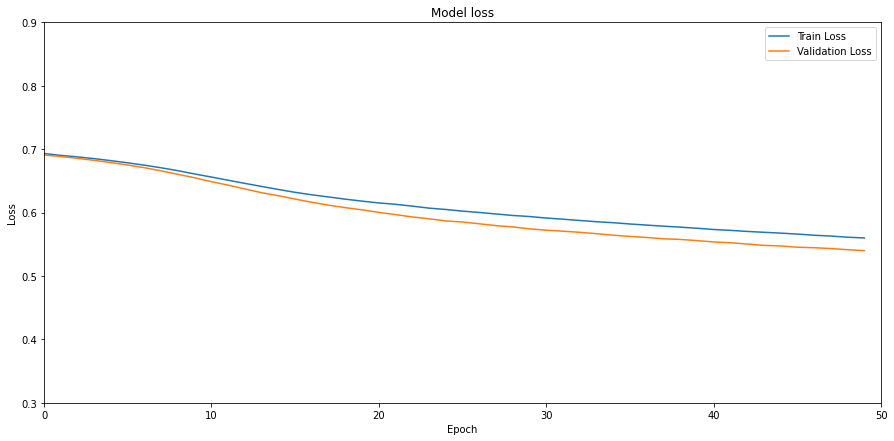

In [42]:
# summarize history for loss
plt.figure(figsize = (15,7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.3,0.9)
plt.show()

## Neural Network: Model Accuracy on Train and Validation Data

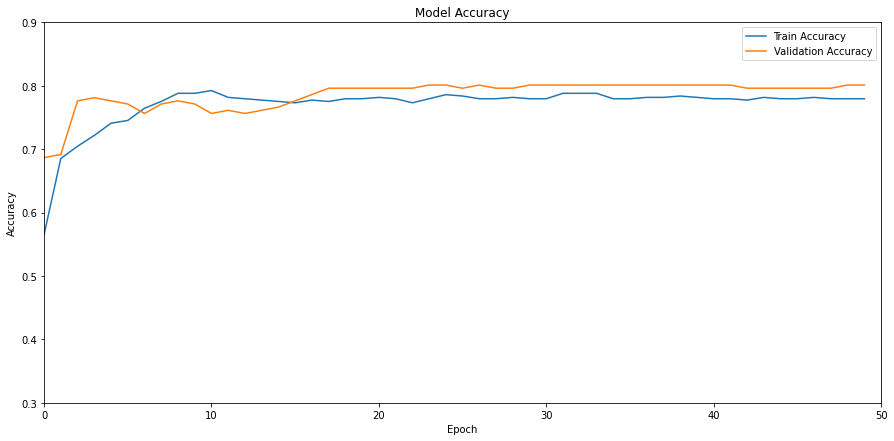

In [43]:
# summarize history for accuracy
plt.figure(figsize = (15,7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.3,0.9)
plt.show()

## Predictions on Test Data

In [44]:
df_test.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [45]:
# applying for loop to bring all the variables in range 0 to 1

for i in df_test.columns[1:]:
    df_test[i] = (df_test[i] - df_test[i].min()) / (df_test[i].max() - df_test[i].min())

In [46]:
df_test.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,0.461538,0.302158,0.508772,0.673469,0.372549,0.593368,0.293233,0.458333
1,2,0.692308,0.705036,0.684211,0.612245,0.196078,0.539267,0.043233,0.500000
2,3,0.461538,0.784173,0.596491,0.530612,0.329412,0.586387,0.482143,0.583333
3,4,0.076923,0.309353,0.508772,0.204082,0.000000,0.443281,0.406955,0.000000
4,5,0.769231,0.086331,0.929825,0.469388,0.096078,0.619546,0.156955,0.541667


In [47]:
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      100 non-null    int64  
 1   A1      100 non-null    float64
 2   A2      100 non-null    float64
 3   A3      100 non-null    float64
 4   A4      100 non-null    float64
 5   A5      100 non-null    float64
 6   A6      100 non-null    float64
 7   A7      100 non-null    float64
 8   A8      100 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 7.2 KB
None


In [48]:
col = ['Id','A1','A2','A3','A4','A5','A6','A7','A8']
X=df_test[col]

In [49]:
print(X.shape)

(100, 9)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)
print(scaler)

StandardScaler()


In [51]:
# Transform and display the training data
X_standardized_test = scaler.transform(X)
test_data = pd.DataFrame(X_standardized_test)
test_data.describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.199041e-16,1.176836e-16,-1.088019e-16,5.093148e-17,1.232348e-16,-3.996803e-17,3.991252e-16,-3.275158e-17,-1.565414e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.714816e+00,-1.198459e+00,-2.306451e+00,-3.972464e+00,-1.312730e+00,-7.259100e-01,-4.009415e+00,-1.264048e+00,-1.100272e+00
25%,-8.574080e-01,-9.032721e-01,-7.583270e-01,-5.273281e-01,-1.312730e+00,-7.259100e-01,-5.459790e-01,-7.035985e-01,-8.509657e-01
50%,0.000000e+00,-3.128982e-01,-9.001115e-02,1.394724e-01,2.046904e-01,-7.259100e-01,-9.390302e-03,-3.203424e-01,-3.108019e-01
75%,8.574080e-01,5.726627e-01,5.783047e-01,5.840062e-01,7.535448e-01,5.547905e-01,4.997592e-01,5.377531e-01,7.279746e-01
max,1.714816e+00,2.638971e+00,2.397139e+00,2.362141e+00,1.851253e+00,3.857650e+00,2.978433e+00,2.972674e+00,2.888630e+00


In [52]:
test_data.head()

,0,1,2,3,4,5,6,7,8
0,-1.714816,0.572663,-0.885222,-0.749595,0.818116,0.981691,0.136952,-0.021701,0.727975
1,-1.680173,1.458224,1.009749,0.361739,0.624403,0.172827,-0.241099,-1.080882,0.894179
2,-1.645531,0.572663,1.381976,-0.193928,0.366118,0.783968,0.088171,0.778657,1.226587
3,-1.610888,-0.903272,-0.851384,-0.749595,-0.667019,-0.725910,-0.911835,0.460106,-1.100272
4,-1.576245,1.753411,-1.900386,1.917607,0.172405,-0.285529,0.319880,-0.599074,1.060383


In [53]:
# make predictions using the best model
test_pred = model_final.predict(X_standardized_test)

# convert predictions to the required label format (o or 1)
final_predictions = [1 if pred > 0.5 else 0 for pred in test_pred]
print(final_predictions)

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [54]:
# create data frame for submission
df_submission = pd.DataFrame(columns = ['Class'])
df_submission['Class'] = final_predictions


In [55]:
df_submission.insert(1, 'Id', range(1, 1 + len(df_submission)))
df_submission

,Class,Id
0,0,1
1,0,2
2,1,3
3,0,4
4,0,5
...,...,...
95,0,96
96,0,97
97,0,98
98,0,99


In [56]:
df_submission['Class'].value_counts(normalize = True)

0    0.7
1    0.3
Name: Class, dtype: float64

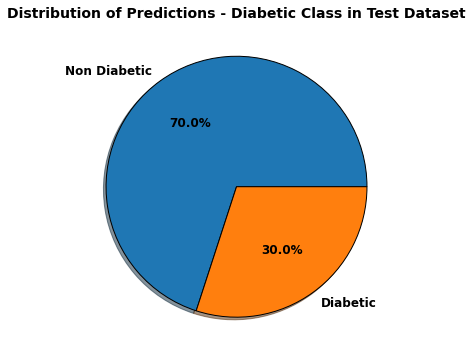

In [57]:
#plt.style.use('ggplot')
plt.figure(figsize=(12,6))
proportion = df_submission['Class'].value_counts()
labels = ['Non Diabetic','Diabetic']
plt.title('Distribution of Predictions - Diabetic Class in Test Dataset',fontsize = 14, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 12,'weight' : 'bold'});

In [58]:
# save data frame to .csv file
df_submission.to_csv('/content/test-predictions.csv', index=False)